In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Matplotlib dependencies
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# Testing for June temperature data : Query for date and temperature
june_date_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()
#print(june_date_temps)

# Query that filters and retrieves temperatures for month of June
query_june_temps = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 6)
print(query_june_temps)


SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [5]:
# 2. Convert the June temperatures to a list.
june_temps = query_june_temps.all()
print(june_temps)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['June Temps'])
june_temps_df.sample(7)

,June Temps
1038,79.0
693,73.0
249,73.0
264,75.0
1316,79.0
754,78.0
360,75.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

# Summary statistics are generated as per challenge instructions

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

# Query for date and temperature: This is used to test if the temperatures are for December.
dec_date_temps = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date) == 12).all()
#print(dec_date_temps)

# Query that filters and retrieves temperatures for month of December
query_dec_temps = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 12)
print(query_dec_temps)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [10]:
# 7. Convert the December temperatures to a list.
dec_temps = query_dec_temps.all()
print(dec_temps)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['December Temps'])
dec_temps_df.sample(7)

,December Temps
285,72.0
71,73.0
1193,70.0
659,68.0
187,70.0
1401,67.0
896,78.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

# Summary statistics generated as per challenge instructions

#### Results
* Plot June Temperatures
* Plot December Temperatures

(0.0, 400.0)

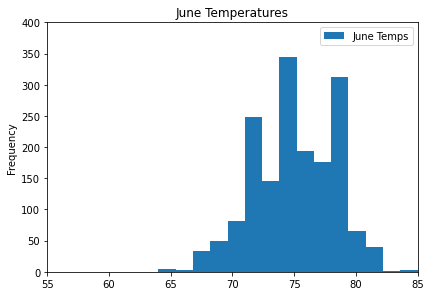

In [14]:
# Plot June temperatures
june_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

(0.0, 400.0)

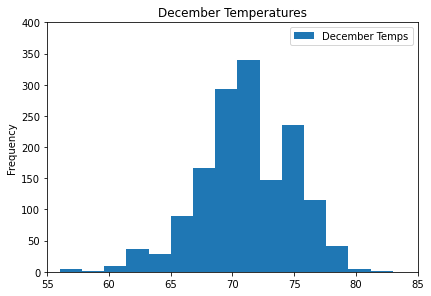

In [15]:
# Plot Dec temperatures
dec_temps_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])

### Additional Queries
* Gather June Precipitation data
* Gather December Precipitation data

In [16]:
# Retrieve June precipitation data
june_temps_prcp = session.query(Measurement.tobs,Measurement.prcp).\
                        filter(extract('month', Measurement.date) == 6).all()
june_temps_prcp_df = pd.DataFrame(june_temps_prcp, columns=['June Temperature','June Precipitation'])
june_temps_prcp_df.describe()

,June Temperature,June Precipitation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [17]:
# Retrieve Dec precipitation data
dec_temps_prcp = session.query(Measurement.tobs,Measurement.prcp).\
                        filter(extract('month', Measurement.date) == 12).all()
dec_temps_prcp_df = pd.DataFrame(dec_temps_prcp, columns=['Dec Temperature','Dec Precipitation'])
dec_temps_prcp_df.describe()

,Dec Temperature,Dec Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000
